In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import zipfile
import shutil
from PIL import Image
from google.colab.patches import cv2_imshow
import random

In [9]:
zipr= zipfile.ZipFile('/content/gpr_dataset_64x64.zip')
zipr.extractall()
zipr.close()

In [ ]:
# Images from /content to a new folder

# import os
# import shutil

# # Source directory
# source_directory = '/content'

# # Destination directory
# destination_directory = '/content/gpr_dataset'

# # Create the destination directory if it doesn't exist
# os.makedirs(destination_directory, exist_ok=True)

# # Iterate over files in the source directory
# for filename in os.listdir(source_directory):
#     # Check if the file is a .jpg file
#     if filename.lower().endswith('.jpg'):
#         # Build the full file paths
#         source_file_path = os.path.join(source_directory, filename)
#         destination_file_path = os.path.join(destination_directory, filename)

#         # Move the file to the destination directory
#         shutil.move(source_file_path, destination_file_path)

# print("Files moved successfully.")


## Preparing dataset

In [ ]:
# Function for resizing and matching
def resize_and_match(image_path, template_path, target_size=(16, 16), stride=(8, 8), threshold=0.8):
    # Read the main image and the template

    img = cv2.imread(image_path)
    template = cv2.imread(template_path, cv2.IMREAD_GRAYSCALE)

    # Resize the template to the target size
    template = cv2.resize(template, target_size)

    # Get the dimensions of the template and the main image
    template_height, template_width = template.shape
    if img is not None:
        img_height, img_width = img.shape[:2]

        # Flag to check if the pattern is detected
        pattern_detected = False

        # Iterate over the image using a sliding window with the specified stride
        for y in range(0, img_height - template_height + 1, stride[1]):
            for x in range(0, img_width - template_width + 1, stride[0]):
                # Initialize the frame dimensions
                frame_top = y
                frame_bottom = y + template_height
                frame_left = x
                frame_right = x + template_width

                # Check if the frame goes beyond the boundaries of the main image
                if frame_bottom > img_height:
                    frame_bottom = img_height
                if frame_right > img_width:
                    frame_right = img_width

                # Extract the region of interest (ROI) from the image
                # A region of interest (ROI) is extracted from the main image, resized to the target size, and converted to grayscale.
                roi = img[frame_top:frame_bottom, frame_left:frame_right]

                # Resize the ROI to the target size
                roi_resized = cv2.resize(roi, target_size)

                # Convert the resized ROI to grayscale
                roi_gray = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2GRAY)

                # Perform template matching
                # Template matching is performed using the cv2.matchTemplate function, and the correlation coefficient is compared to the specified threshold.
                # cv2: Refers to the OpenCV library in Python.
                # TM: Stands for template matching.
                # CCOEFF: Indicates the cross-correlation coefficient.
                # NORMED: Suggests that the result is normalized.
                result = cv2.matchTemplate(roi_gray, template, cv2.TM_CCOEFF_NORMED)
                _, max_val, _, max_loc = cv2.minMaxLoc(result)

                # Check if the correlation coefficient is above the threshold
                if max_val >= threshold:
                    # Draw a rectangle around the matched region in the original image
                    # top_left = (frame_left + max_loc[0], frame_top + max_loc[1])
                    # bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
                    # cv2.rectangle(img, top_left, bottom_right, (0, 255, 0), 2)

                    # Set the flag to indicate the pattern is detected
                    pattern_detected = True

        # Display the result using cv2_imshow in Colab
        # cv2_imshow(img)

        # Print a message if the pattern is detected
        if pattern_detected:
            return 1
        else:
            return 0


threshold_values = np.arange(0.1, 1.0, 0.1)
# Directory paths
image_directory = '/content/gpr_dataset_64x64'
labels_directory = '/content/gpr_labels_dataset_64x64'
template_path_hyperbola = '/content/hyperbola.jpeg'
template_path_manhole = '/content/manhole.jpeg'
template_path_subsoil = '/content/subsoil.jpeg'
template_path_layers = '/content/layers.jpeg'

# Ensure the labels directory exists
os.makedirs(labels_directory, exist_ok=True)

for image_file in os.listdir(image_directory):
  # Hyperbola detection
  f=0
  image_path = os.path.join(image_directory, image_file)
  for threshold in threshold_values:
      if resize_and_match(image_path, template_path_hyperbola, threshold=threshold):
          hyperbola_label = 1
          f=1
          with open(os.path.join(labels_directory, f'{os.path.splitext(image_file)[0]}_hyperbola.txt'), 'w') as f:
            f.write(str(hyperbola_label))

  # Manhole detection
  if f == 0:
    for threshold in threshold_values:
        if resize_and_match(image_path, template_path_manhole, threshold=threshold):
            f=1
            manhole_label = 2
            with open(os.path.join(labels_directory, f'{os.path.splitext(image_file)[0]}_manhole.txt'), 'w') as f:
              f.write(str(manhole_label))

  # Subsoil detection
  if f == 0:
    for threshold in threshold_values:
        if resize_and_match(image_path, template_path_subsoil, threshold=threshold):
            f=1
            layers_label = 3
            with open(os.path.join(labels_directory, f'{os.path.splitext(image_file)[0]}_layers.txt'), 'w') as f:
              f.write(str(layers_label))

  # Layers detection
  if f == 0:
    for threshold in threshold_values:
        if resize_and_match(image_path, template_path_layers, threshold=threshold):
            f=1
            subsoil_label = 4
            with open(os.path.join(labels_directory, f'{os.path.splitext(image_file)[0]}_subsoil.txt'), 'w') as f:
              f.write(str(subsoil_label))



In [1]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk('/content'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 5 directories and 2 images in '/content'.
There are 2 directories and 7 images in '/content/.config'.
There are 1 directories and 0 images in '/content/.config/logs'.
There are 0 directories and 6 images in '/content/.config/logs/2023.12.18'.
There are 0 directories and 1 images in '/content/.config/configurations'.
There are 0 directories and 9544 images in '/content/gpr1_dataset_64x64'.
There are 0 directories and 9544 images in '/content/gpr_labels_dataset_64x64'.
There are 0 directories and 0 images in '/content/.ipynb_checkpoints'.
There are 0 directories and 6 images in '/content/sample_data'.


In [ ]:
# List to store the names of images with no labels
images_with_no_labels = []

# Iterate through the images in the dataset
for image_file in os.listdir(image_directory):
    image_path = os.path.join(image_directory, image_file)

    # Check if there are no labels for the current image
    if not any(label_file.startswith(os.path.splitext(image_file)[0]) for label_file in os.listdir(labels_directory)):
        # Add the image name to the list of images with no labels
        images_with_no_labels.append(image_file)
        # Construct the full path to the image and delete it
        full_image_path = os.path.join(image_directory, image_file)
        os.remove(full_image_path)

# Print the names of images with no labels
print("Images with no labels:", images_with_no_labels)

Images with no labels: ['cropped_19_4_226_04T.jpg', 'cropped_26_5_199_04T.jpg', 'cropped_18_3_198_04T.jpg', 'cropped_21_4_229_04T.jpg', 'cropped_15_3_223_04T.jpg', 'cropped_23_5_235_04T.jpg', 'cropped_27_4_211_04T.jpg', 'cropped_24_6_230_04T.jpg', 'cropped_6_3_195_04T.jpg', 'cropped_26_3_212_04T.jpg', 'cropped_18_3_222_04T.jpg', 'cropped_15_3_227_04T.jpg', 'cropped_16_3_227_04T.jpg', 'cropped_22_3_197_04T.jpg', 'cropped_24_5_205_04T.jpg', 'cropped_27_3_233_04T.jpg', 'cropped_18_7_230_04T.jpg', 'cropped_3_4_216_04T.jpg', 'cropped_19_4_197_04T.jpg', 'cropped_4_8_223_04T.jpg', 'cropped_27_3_196_05T.jpg', 'cropped_18_4_210_04T.jpg', 'cropped_12_6_205_04T.jpg', 'cropped_16_4_230_04T.jpg', 'cropped_15_4_222_04T.jpg', 'cropped_20_3_195_04T.jpg', 'cropped_17_3_198_04T.jpg', 'cropped_19_6_205_04T.jpg', 'cropped_8_3_202_04T.jpg', 'cropped_4_5_196_05T.jpg', 'cropped_11_7_223_04T.jpg', 'cropped_16_3_195_04T.jpg', 'cropped_4_6_205_04T.jpg', 'cropped_3_3_231_04T.jpg', 'cropped_14_3_224_01T.jpg', 'cr

## Folder to zip

In [ ]:
# import shutil

# # Specify the path to the folder you want to zip
# folder_path = '/content/gpr_dataset_64x64'

# # Specify the path for the output zip file
# zip_file_path = '/content/gpr1_dataset_64x64'

# # Create a zip file of the folder
# shutil.make_archive(zip_file_path, 'zip', folder_path)

# # Verify that the zip file has been created
# print(f"Zip file created at: {zip_file_path}")


Zip file created at: /content/gpr1_dataset_64x64


## Number of labels

In [23]:
import os

# Directory path for labels
labels_directory = '/content/gpr_labels_dataset_64x64'

# Initialize counters for each class
hyperbola_count = 0
manhole_count = 0
layers_count = 0
subsoil_count = 0

# Iterate through each label file
for label_file in os.listdir(labels_directory):
    label_path = os.path.join(labels_directory, label_file)

    # Read the content of the label file
    with open(label_path, 'r') as f:
        label = int(f.read())

    # Update counts based on label
    if label == 1:
        hyperbola_count += 1
    elif label == 2:
        manhole_count += 1
    elif label == 3:
        layers_count += 1
    elif label == 4:
        subsoil_count += 1

# Display the counts
print(f'Hyperbola Count: {hyperbola_count}')
print(f'Manhole Count: {manhole_count}')
print(f'Layers Count: {layers_count}')
print(f'Subsoil Count: {subsoil_count}')


Hyperbola Count: 9154
Manhole Count: 372
Layers Count: 12
Subsoil Count: 6


### Template matching

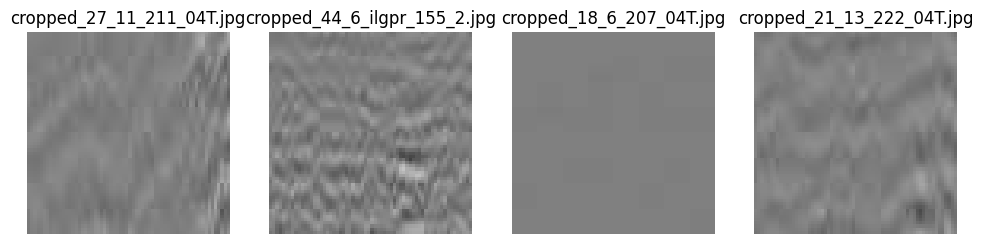

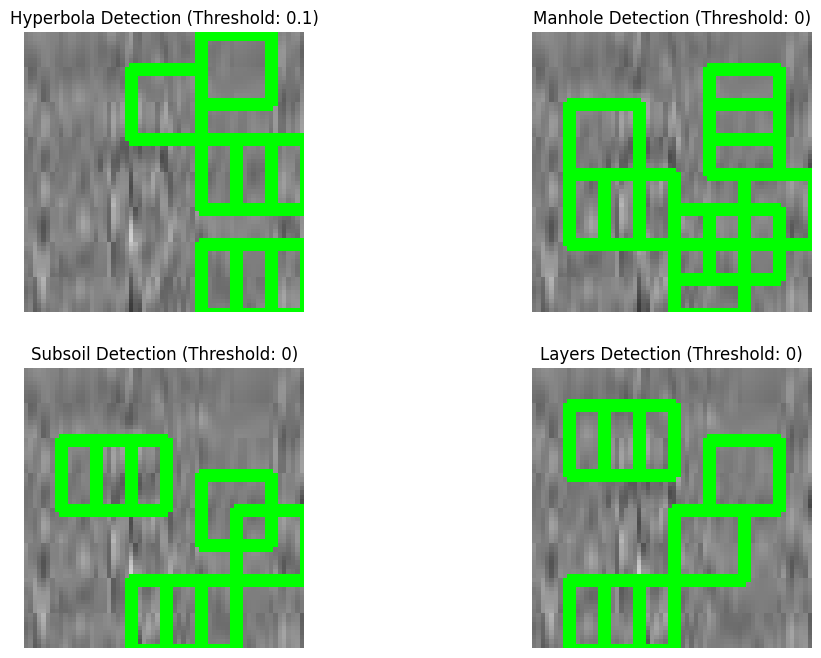

In [ ]:
import cv2
import os
import random
import numpy as np
import matplotlib.pyplot as plt

# Function for resizing and matching
def resize_and_match(image_path, template, target_size=(16, 16), stride=(8, 8), threshold_range=(0.1, 1.0)):
    # Read the main image
    img = cv2.imread(image_path)
    img_draw = img.copy()

    # Resize the template to the target size
    template = cv2.resize(template, target_size)

    # Get the dimensions of the template and the main image
    template_height, template_width = template.shape
    img_height, img_width = img.shape[:2]

    best_threshold = 0
    max_detection = 0

    # Iterate over the threshold range
    for threshold in np.arange(threshold_range[0], threshold_range[1], 0.1):
        # Flag to check if the pattern is detected
        pattern_detected = False

        # Iterate over the image using a sliding window with the specified stride
        for y in range(0, img_height - template_height + 1, stride[1]):
            for x in range(0, img_width - template_width + 1, stride[0]):
                # Initialize the frame dimensions
                frame_top = y
                frame_bottom = y + template_height
                frame_left = x
                frame_right = x + template_width

                # Check if the frame goes beyond the boundaries of the main image
                if frame_bottom > img_height:
                    frame_bottom = img_height
                if frame_right > img_width:
                    frame_right = img_width

                # Extract the region of interest (ROI) from the image
                roi = img[frame_top:frame_bottom, frame_left:frame_right]

                # Resize the ROI to the target size
                roi_resized = cv2.resize(roi, target_size)

                # Convert the resized ROI to grayscale
                roi_gray = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2GRAY)

                # Perform template matching
                result = cv2.matchTemplate(roi_gray, template, cv2.TM_CCOEFF_NORMED)
                _, max_val, _, max_loc = cv2.minMaxLoc(result)

                # Check if the correlation coefficient is above the threshold
                if max_val >= threshold:
                    # Set the flag to indicate the pattern is detected
                    pattern_detected = True

                    # Draw a rectangle around the matched region in the original image
                    top_left = (frame_left + max_loc[0], frame_top + max_loc[1])
                    bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
                    cv2.rectangle(img_draw, top_left, bottom_right, (0, 255, 0), 2)

        # Update the best threshold and detection count
        if pattern_detected:
            detection_count = np.sum(result >= threshold)
            if detection_count > max_detection:
                max_detection = detection_count
                best_threshold = threshold

    # Return the best threshold and the image with bounding boxes
    return best_threshold, img_draw

# Function to plot random images
def plot_random_images(directory, num_images=4):
    image_files = os.listdir(directory)
    selected_files = random.sample(image_files, num_images)

    plt.figure(figsize=(12, 8))

    for i, image_file in enumerate(selected_files, 1):
        image_path = os.path.join(directory, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(1, num_images, i)
        plt.imshow(img)
        plt.axis('off')
        plt.title(image_file)

    plt.show()

# Directory paths
image_directory = '/content/gpr_dataset_64x64'
labels_directory = '/content/gpr_labels_dataset_64x64'
template_path_hyperbola = '/content/hyperbola.jpeg'
template_path_manhole = '/content/manhole.jpeg'
template_path_subsoil = '/content/subsoil.jpeg'
template_path_layers = '/content/layers.jpeg'

# Ensure the labels directory exists
os.makedirs(labels_directory, exist_ok=True)

# Plot random images
plot_random_images(image_directory)

# Randomly select an image for template matching
random_image_file = random.choice(os.listdir(image_directory))
random_image_path = os.path.join(image_directory, random_image_file)

# Load templates
template_hyperbola = cv2.imread(template_path_hyperbola, cv2.IMREAD_GRAYSCALE)
template_manhole = cv2.imread(template_path_manhole, cv2.IMREAD_GRAYSCALE)
template_subsoil = cv2.imread(template_path_subsoil, cv2.IMREAD_GRAYSCALE)
template_layers = cv2.imread(template_path_layers, cv2.IMREAD_GRAYSCALE)

# Find the best threshold for each template and get the image with bounding boxes
best_threshold_hyperbola, img_draw_hyperbola = resize_and_match(random_image_path, template_hyperbola)
best_threshold_manhole, img_draw_manhole = resize_and_match(random_image_path, template_manhole)
best_threshold_subsoil, img_draw_subsoil = resize_and_match(random_image_path, template_subsoil)
best_threshold_layers, img_draw_layers = resize_and_match(random_image_path, template_layers)

# Display the results
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(img_draw_hyperbola)
plt.axis('off')
plt.title(f"Hyperbola Detection (Threshold: {best_threshold_hyperbola})")

plt.subplot(2, 2, 2)
plt.imshow(img_draw_manhole)
plt.axis('off')
plt.title(f"Manhole Detection (Threshold: {best_threshold_manhole})")

plt.subplot(2, 2, 3)
plt.imshow(img_draw_subsoil)
plt.axis('off')
plt.title(f"Subsoil Detection (Threshold: {best_threshold_subsoil})")

plt.subplot(2, 2, 4)
plt.imshow(img_draw_layers)
plt.axis('off')
plt.title(f"Layers Detection (Threshold: {best_threshold_layers})")

plt.show()


## Template matching 2

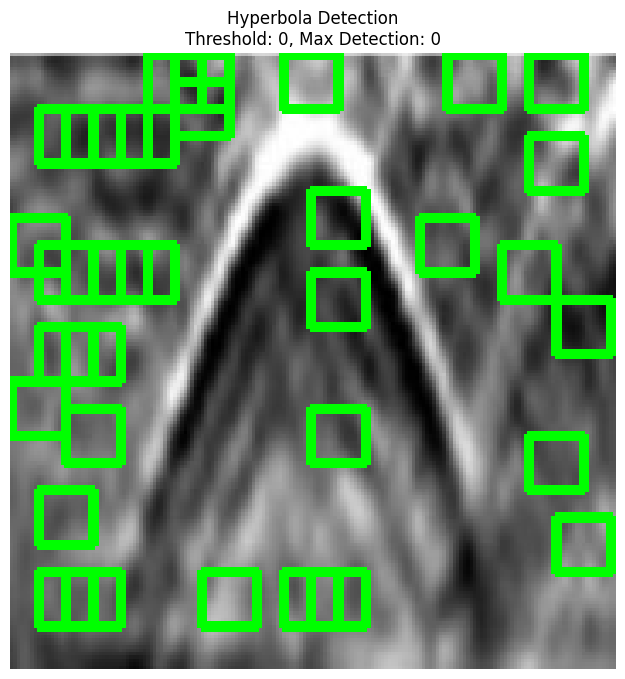

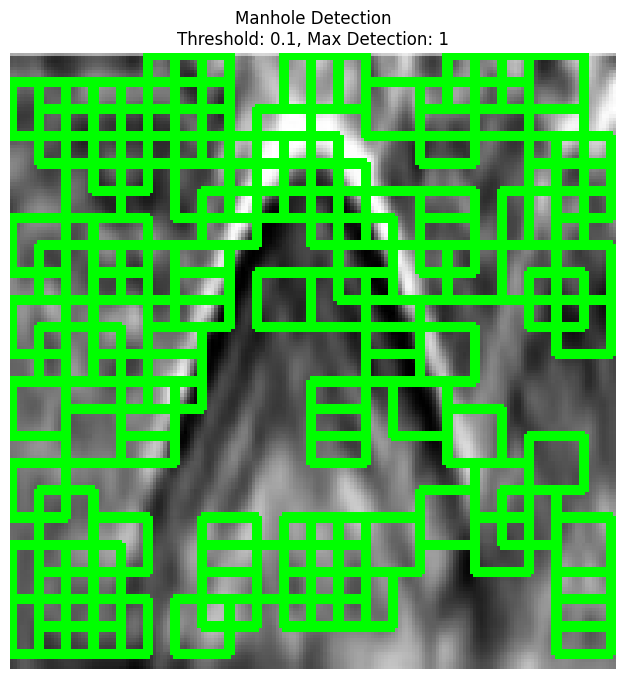

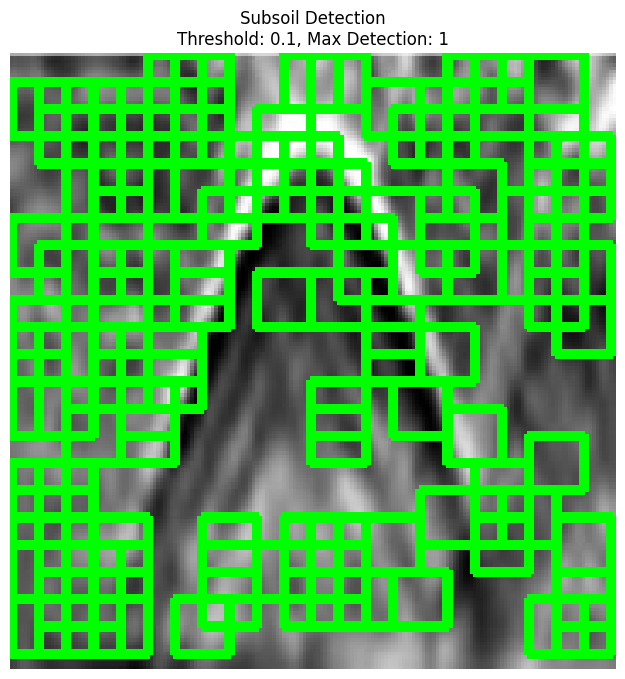

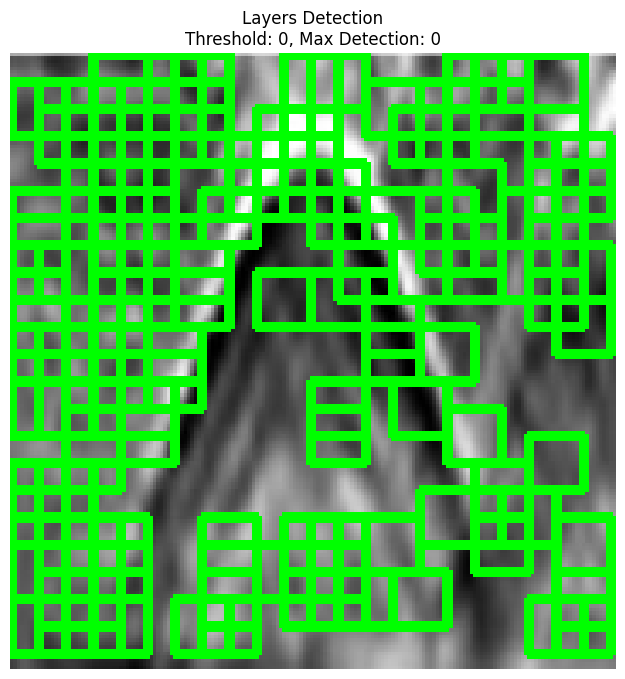

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def search_templates_in_custom_image(custom_image_path, templates, target_size=(16, 16), stride=(8, 8), threshold_range=(0.1, 1.0)):
    # Read the custom image
    img = cv2.imread(custom_image_path)
    img_draw = img.copy()

    # Get the dimensions of the custom image
    img_height, img_width = img.shape[:2]

    # Dictionary to store results for each template
    template_results = {}

    # Iterate over each template
    for template_name, template in templates.items():
        # Resize the template to the target size
        template = cv2.resize(template, target_size)

        # Get the dimensions of the template
        template_height, template_width = template.shape

        best_threshold = 0
        max_detection = 0

        # Iterate over the threshold range
        for threshold in np.arange(threshold_range[0], threshold_range[1], 0.1):
            # Flag to check if the pattern is detected
            pattern_detected = False

            # Iterate over the image using a sliding window with the specified stride
            for y in range(0, img_height - template_height + 1, stride[1]):
                for x in range(0, img_width - template_width + 1, stride[0]):
                    # Initialize the frame dimensions
                    frame_top = y
                    frame_bottom = y + template_height
                    frame_left = x
                    frame_right = x + template_width

                    # Check if the frame goes beyond the boundaries of the custom image
                    if frame_bottom > img_height:
                        frame_bottom = img_height
                    if frame_right > img_width:
                        frame_right = img_width

                    # Extract the region of interest (ROI) from the image
                    roi = img[frame_top:frame_bottom, frame_left:frame_right]

                    # Resize the ROI to the target size
                    roi_resized = cv2.resize(roi, target_size)

                    # Convert the resized ROI to grayscale
                    roi_gray = cv2.cvtColor(roi_resized, cv2.COLOR_BGR2GRAY)

                    # Perform template matching
                    result = cv2.matchTemplate(roi_gray, template, cv2.TM_CCOEFF_NORMED)
                    _, max_val, _, max_loc = cv2.minMaxLoc(result)

                    # Check if the correlation coefficient is above the threshold
                    if max_val >= threshold:
                        # Set the flag to indicate the pattern is detected
                        pattern_detected = True

                        # Draw a rectangle around the matched region in the original image
                        top_left = (frame_left + max_loc[0], frame_top + max_loc[1])
                        bottom_right = (top_left[0] + template_width, top_left[1] + template_height)
                        cv2.rectangle(img_draw, top_left, bottom_right, (0, 255, 0), 2)

            # Update the best threshold and detection count
            if pattern_detected:
                detection_count = np.sum(result >= threshold)
                if detection_count > max_detection:
                    max_detection = detection_count
                    best_threshold = threshold

        # Store the results for the current template
        template_results[template_name] = {
            'best_threshold': best_threshold,
            'max_detection': max_detection,
            'img_with_boxes': img_draw.copy()
        }

    return template_results

# Function to display results
def display_results(template_results):
    for template_name, result in template_results.items():
        img_with_boxes = result['img_with_boxes']
        best_threshold = result['best_threshold']
        max_detection = result['max_detection']

        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
        plt.title(f"{template_name} Detection\nThreshold: {best_threshold}, Max Detection: {max_detection}")
        plt.axis('off')
        plt.show()

# Example usage:

# Specify paths to custom image and template images
custom_image_path = '/content/hyperbola.jpeg'
template_paths = {
    'Hyperbola': '/content/hyperbola.jpeg',
    'Manhole': '/content/manhole.jpeg',
    'Subsoil': '/content/subsoil.jpeg',
    'Layers': '/content/layers.jpeg'
}

# Load templates
templates = {name: cv2.imread(path, cv2.IMREAD_GRAYSCALE) for name, path in template_paths.items()}

# Search for templates in the custom image
results = search_templates_in_custom_image(custom_image_path, templates)

# Display results
display_results(results)


## CNN

In [3]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
from IPython.core.display import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Define the paths to your image and label folders
num_classes = 5
image_folder = '/content/gpr1_dataset_64x64'
label_folder = '/content/gpr_labels_dataset_64x64'

In [5]:
def load_data(image_folder, label_folder, num_classes):
    images = []
    labels = []

    for filename in os.listdir(image_folder):
        if filename.endswith(".jpg"):
            img_path = os.path.join(image_folder, filename)
            label_path = os.path.join(label_folder, filename.replace(".jpg", ".txt"))

            # Load image
            img = cv2.imread(img_path)
            img = cv2.resize(img, (64, 64))  # You can adjust the size based on your requirements
            images.append(img)

            # Load label
            with open(label_path, 'r') as file:
                label = int(file.read().strip())
                labels.append(label)

    # Convert labels to one-hot encoding using NumPy arrays
    labels = np.array(labels)
    labels = np.eye(num_classes)[labels]

    return np.array(images) / 255.0, labels

In [10]:
# Load data
X, y = load_data(image_folder, label_folder, num_classes)

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [15]:
y_test.shape

(1909, 5)

In [16]:
# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
239/239 [==============================] - 7s 10ms/step - loss: 0.1914 - accuracy: 0.9606 - val_loss: 0.1830 - val_accuracy: 0.9534
Epoch 2/10
239/239 [==============================] - 2s 8ms/step - loss: 0.1718 - accuracy: 0.9606 - val_loss: 0.2520 - val_accuracy: 0.9534
Epoch 3/10
239/239 [==============================] - 2s 8ms/step - loss: 0.1652 - accuracy: 0.9606 - val_loss: 0.1713 - val_accuracy: 0.9534
Epoch 4/10
239/239 [==============================] - 2s 10ms/step - loss: 0.1649 - accuracy: 0.9606 - val_loss: 0.1753 - val_accuracy: 0.9534
Epoch 5/10
239/239 [==============================] - 2s 10ms/step - loss: 0.1404 - accuracy: 0.9606 - val_loss: 0.1819 - val_accuracy: 0.9534
Epoch 6/10
239/239 [==============================] - 2s 7ms/step - loss: 0.1465 - accuracy: 0.9606 - val_loss: 0.1630 - val_accuracy: 0.9534
Epoch 7/10
239/239 [==============================] - 2s 7ms/step - loss: 0.1280 - accuracy: 0.9606 - val_loss: 0.1342 - val_accuracy: 0.9534
Epo

In [17]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

60/60 [==============================] - 0s 4ms/step - loss: 0.1481 - accuracy: 0.9534
Test accuracy: 0.9533787369728088


In [18]:
# Load and preprocess the custom image
custom_image_path = '/content/gpr1_dataset_64x64/cropped_10_10_195_04T.jpg'  # Replace with the actual path of your custom image
custom_image = cv2.imread(custom_image_path)
custom_image = cv2.resize(custom_image, (64, 64))  # Adjust the size based on your model input size
custom_image = custom_image / 255.0  # Normalize the pixel values to the range [0, 1]
custom_image = np.expand_dims(custom_image, axis=0)  # Add a batch dimension

# Make predictions
predictions = model.predict(custom_image)

# Get the predicted class label
predicted_class_index = np.argmax(predictions)
predicted_class = f"Class {predicted_class_index}"

print(f"The predicted class is: {predicted_class}")

1/1 [==============================] - 0s 314ms/step
The predicted class is: Class 1


In [19]:
from tensorflow.keras.models import load_model


# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save('/content/cnn_model.h5')


# Load the saved model
loaded_model = load_model('/content/cnn_model.h5')


Epoch 1/10
239/239 [==============================] - 2s 8ms/step - loss: 0.1068 - accuracy: 0.9606 - val_loss: 0.1285 - val_accuracy: 0.9534
Epoch 2/10
239/239 [==============================] - 2s 7ms/step - loss: 0.1032 - accuracy: 0.9606 - val_loss: 0.1156 - val_accuracy: 0.9534
Epoch 3/10
239/239 [==============================] - 2s 7ms/step - loss: 0.0986 - accuracy: 0.9606 - val_loss: 0.1078 - val_accuracy: 0.9534
Epoch 4/10
239/239 [==============================] - 2s 7ms/step - loss: 0.0944 - accuracy: 0.9606 - val_loss: 0.1104 - val_accuracy: 0.9534
Epoch 5/10
239/239 [==============================] - 2s 7ms/step - loss: 0.0914 - accuracy: 0.9619 - val_loss: 0.1077 - val_accuracy: 0.9534
Epoch 6/10
239/239 [==============================] - 2s 7ms/step - loss: 0.0881 - accuracy: 0.9646 - val_loss: 0.1191 - val_accuracy: 0.9534
Epoch 7/10
239/239 [==============================] - 2s 8ms/step - loss: 0.1032 - accuracy: 0.9616 - val_loss: 0.0978 - val_accuracy: 0.9602
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_and_predict(image_path, model):
    # Load and preprocess the custom image
    custom_image = image.load_img(image_path, target_size=(64, 64))
    custom_image = image.img_to_array(custom_image)
    custom_image = np.expand_dims(custom_image, axis=0)
    custom_image = custom_image / 255.0  # Normalize the pixel values to the range [0, 1]

    # Make predictions
    predictions = model.predict(custom_image)

    # Get the predicted class label
    predicted_class_index = np.argmax(predictions)
    predicted_class = f"Class {predicted_class_index}"

    return predicted_class

# Usage
image_path_to_predict = '/content/gpr1_dataset_64x64/cropped_12_6_212_04T.jpg'
predicted_class = preprocess_and_predict(image_path_to_predict, loaded_model)
print(f"The predicted class is: {predicted_class}")


1/1 [==============================] - 0s 26ms/step
The predicted class is: Class 2


In [26]:
preprocess_and_predict('/content/gpr1_dataset_64x64/cropped_10_10_201_04T.jpg', loaded_model)

1/1 [==============================] - 0s 27ms/step


'Class 1'